##### Import required libraries and load Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

transaction_data = pd.read_csv("QVI_transaction_data_csv.csv")

customer_data = pd.read_csv("QVI_purchase_behaviour.csv")

###### Examining transaction data 
Looking for null values and data types 

In [2]:
# Summurize the dataset to check for nulls
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


Analysing the above data it looks like there are no null values in dataset

##### Describing transaction data

In [3]:
# Describe dataset to check for outliers
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Product Quantity and Total Sales appears to have an outlier we need to investigate further. <br>
Let's investigate further the case where 200 packs of chips are brought in single transaction.

In [4]:
# Filter the dataset to find outlier
transaction_data[transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction and both of these
transactions where by the same customer.

In [5]:
# Let's see if the customer has had other transactions
transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail
customer. The customer might be buying chips for commercial purposes instead. We’ll remove this loyalty
card number from further analysis.

In [6]:
# Filter out the customer based on the loyalty card number
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != 226000]

# Re‐examine transaction data
transaction_data.describe(include= 'all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264834.000000,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834,264834.000000,264834.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036230,135.079423,1.355488e+05,1.351576e+05,56.583554,NaN,1.905813,7.299346
std,105.389007,76.784063,8.057990e+04,7.813292e+04,32.826444,NaN,0.343436,2.527241
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760050e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.000000,1.303570e+05,1.351365e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.000000,2.030940e+05,2.026998e+05,85.000000,NaN,2.000000,9.200000


Values in Date column appears to be in Excel serial date format. In Excel, dates are often represented as the number of days since January 1, 1900 (including leap days) <br>
Lets convert this Excel serial date to a more readable date format

In [7]:
# Convert Date column
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'],unit = 'D', origin='1899-12-30')

We should check that we are looking at the right products by examining PROD_NAME.

In [8]:
# Examine PROD_NAME
for i in transaction_data['PROD_NAME'].value_counts().keys():
    print(i)

Kettle Mozzarella   Basil & Pesto 175g
Kettle Tortilla ChpsHny&Jlpno Chili 150g
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
Tyrrells Crisps     Ched & Chives 165g
Cobs Popd Sea Salt  Chips 110g
Kettle 135g Swt Pot Sea Salt
Tostitos Splash Of  Lime 175g
Infuzions Thai SweetChili PotatoMix 110g
Smiths Crnkle Chip  Orgnl Big Bag 380g
Thins Potato Chips  Hot & Spicy 175g
Kettle Sensations   Camembert & Fig 150g
Doritos Corn Chips  Cheese Supreme 170g
Pringles Barbeque   134g
Doritos Corn Chip Mexican Jalapeno 150g
Kettle Sweet Chilli And Sour Cream 175g
Smiths Crinkle Chips Salt & Vinegar 330g
Thins Chips Light&  Tangy 175g
Dorito Corn Chp     Supreme 380g
Pringles Sweet&Spcy BBQ 134g
Infuzions BBQ Rib   Prawn Crackers 110g
Tyrrells Crisps     Lightly Salted 165g
Kettle Sea Salt     And Vinegar 175g
Doritos Corn Chip Southern Chicken 150g
Twisties Chicken270g
Twisties Cheese     Burger 250g
Grain Waves         Sweet Chilli 210g
Pringles SourCream  Onion 134g
Doritos Corn Chips  Nacho Cheese 1

There are salsa products in the dataset but we are only interested in the chips category, so let’s remove these.

In [9]:
# Removing Salsa products
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('Salsa', case=False)]

In [10]:
# Count the number of transactions by date
transaction_data['DATE'].value_counts()

2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: DATE, Length: 364, dtype: int64

There’s only 364 rows, meaning only 364 dates which indicates a missing date. Let’s create a sequence of
dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to
find the missing date.

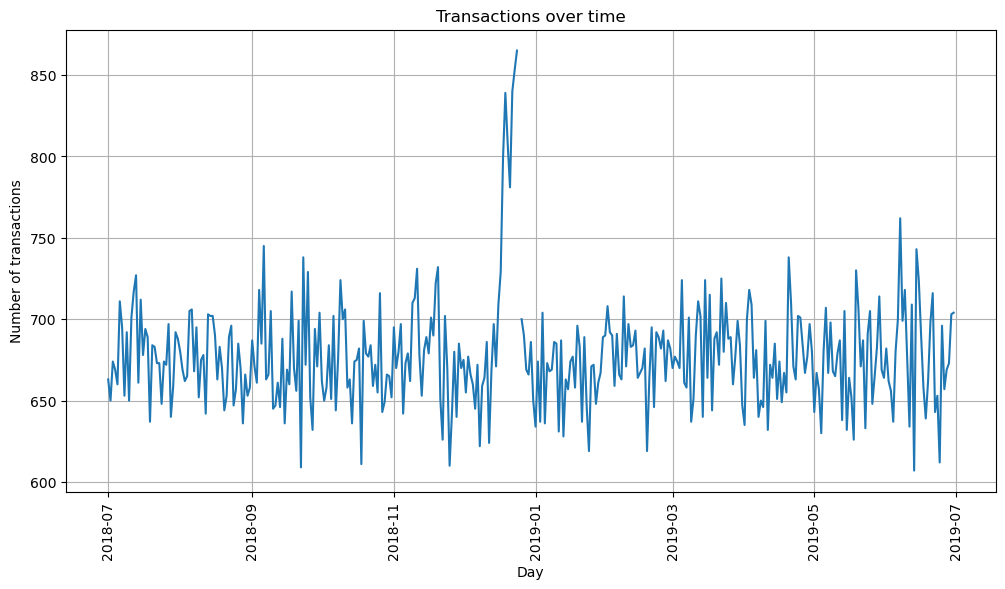

In [11]:
# Create a sequence of dates
all_dates = pd.date_range(start="2018-07-01", end="2019-06-30", freq="D")
all_dates_df = pd.DataFrame({"DATE": all_dates})

# Merge with transactionData to get count of transactions by date
transactions_by_day = all_dates_df.merge(transaction_data.groupby('DATE').size().reset_index(name='N'),
                                        on='DATE', how='left')

# Plot transactions over time
plt.figure(figsize=(12, 6))
plt.plot(transactions_by_day['DATE'], transactions_by_day['N'])
plt.xlabel("Day")
plt.ylabel("Number of transactions")
plt.title("Transactions over time")
plt.xticks(rotation=90)
plt.grid()
plt.show()

We can see that there is an increase in purchases in December and a break in late December. Let’s zoom in
on this.

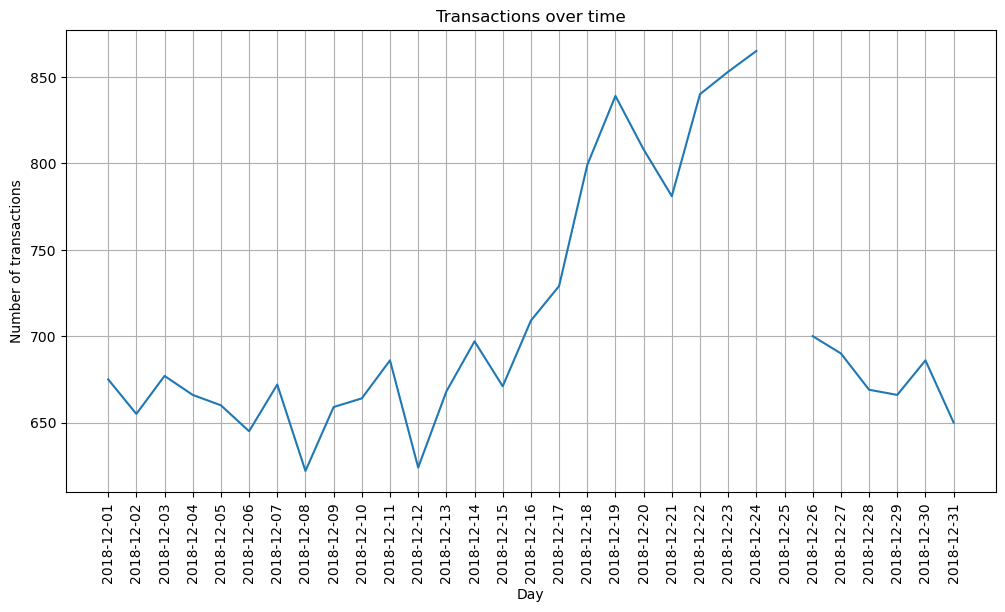

In [12]:
# Filter to December and look at individual days
december_transactions = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

# Plot transactions for December over individual days
plt.figure(figsize=(12, 6))
plt.plot(december_transactions['DATE'], december_transactions['N'])
plt.xlabel("Day")
plt.ylabel("Number of transactions")
plt.title("Transactions over time")
plt.xticks(rotation=90, ticks=december_transactions['DATE'])
plt.grid()
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on
Christmas day itself. This is due to shops being closed on Christmas day.
Now that we are satisfied that the data no longer has outliers, we can move on to creating other features
such as brand of chips or pack size from PROD_NAME. We will start with pack size.

In [13]:
# Pack size
# We can work this out by taking the digits that are in PROD_NAME
transaction_data['PACK_SIZE(g)'] = transaction_data['PROD_NAME'].str.extract('(\d+)')
transaction_data['PACK_SIZE(g)'] = pd.to_numeric(transaction_data['PACK_SIZE(g)'])

# Always check your output
# Let's check if the pack sizes look sensible
transaction_data['PACK_SIZE(g)'].value_counts()

175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PACK_SIZE(g), dtype: int64

The largest size is 380g and the smallest size is 70g

In [14]:
# Let's check the output of the first few rows to see if we have indeed picked out pack size.
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g)
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


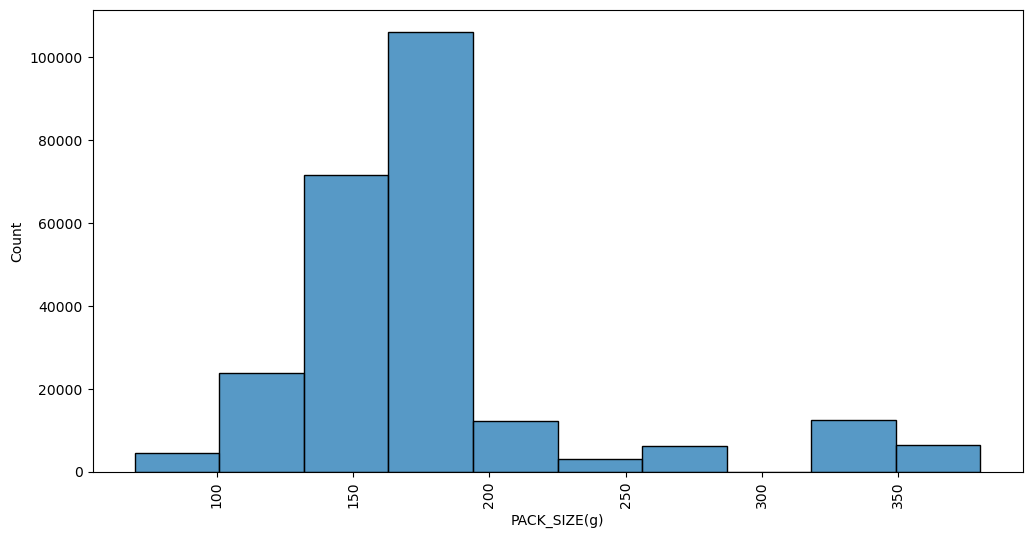

In [15]:
# Let's plot bar graph for pack sizes and count because it is a categorical data
plt.figure(figsize=(12, 6))
sns.histplot(data= transaction_data, x= 'PACK_SIZE(g)', bins= 10)
plt.xticks(rotation= 90)
plt.show()

Now create brands column, we can use the first word in PROD_NAME.

In [16]:
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]
# Checking brands
transaction_data['BRAND'].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red
Rock Deli chips. Let’s combine these together.

In [17]:
# Clean brand names
transaction_data['BRAND'].replace('Red', 'RRD', inplace=True)
transaction_data['BRAND'].replace('Snbts', 'Sunbites', inplace=True)
transaction_data['BRAND'].replace('Infzns', 'Infuzions', inplace=True)
transaction_data['BRAND'].replace('WW', 'Woolworths', inplace=True)
transaction_data['BRAND'].replace('Smith', 'Smiths', inplace=True)
transaction_data['BRAND'].replace('NCC', 'Natural', inplace=True)
transaction_data['BRAND'].replace('Dorito', 'Doritos', inplace=True)
transaction_data['BRAND'].replace('Grain', 'GrnWves', inplace=True)

# Check again
transaction_data['BRAND'].value_counts()

Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
GrnWves        7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: BRAND, dtype: int64

##### Examining customer data

Now that we are happy with the transaction dataset, let’s have a look at the customer dataset.

In [18]:
# Examining customer data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
customer_data.describe(include= 'all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


Let’s have a closer look at the LIFESTAGE and PREMIUM_CUSTOMER columns.

In [20]:
# Examining the values of lifestage and premium_customer
customer_data['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [21]:
customer_data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

As there do not seem to be any issues with the customer data, we can now go ahead and join the transaction
and customer data sets together

In [22]:
# Merge transaction data and customer data
merged_data = pd.merge(transaction_data, customer_data, how= 'left', on= 'LYLTY_CARD_NBR')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE(g)      246740 non-null  int64         
 9   BRAND             246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.5+ MB


As the number of rows in merged_data is the same as that of transaction_data, we can be sure that no duplicates
were created. This is because we created merged_data by using a left join method which
means take all the rows in transaction_data and find rows with matching values in shared columns and
then joining the details in these rows the first mentioned table.

Let’s also check if some customers were not matched on by checking for nulls.

In [23]:
merged_data['LIFESTAGE'].isnull().sum()

0

In [24]:
merged_data['PREMIUM_CUSTOMER'].isnull().sum()

0

Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer
dataset. <br>
Now convert merged_data to csv file.

In [25]:
merged_data.to_csv("QVI_data.csv", index = False)

Data exploration is now complete!

##### Data analysis on customer segments
Let’s start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by
these segments to describe which customer segment contribute most to chip sales.

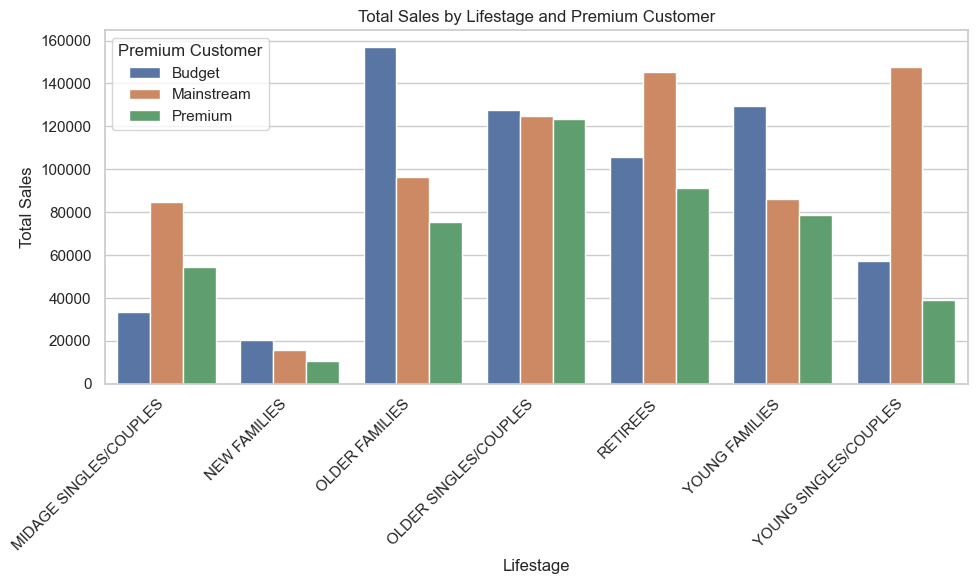

In [45]:
# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Create the mosaic plot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=sales, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.title("Total Sales by Lifestage and Premium Customer")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Premium Customer")
plt.tight_layout()
plt.savefig("Total Sales by Lifestage and Premium Customer.jpg", dpi = 1200)
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees <br>
Let’s see if the higher sales are due to there being more customers who buy chips.

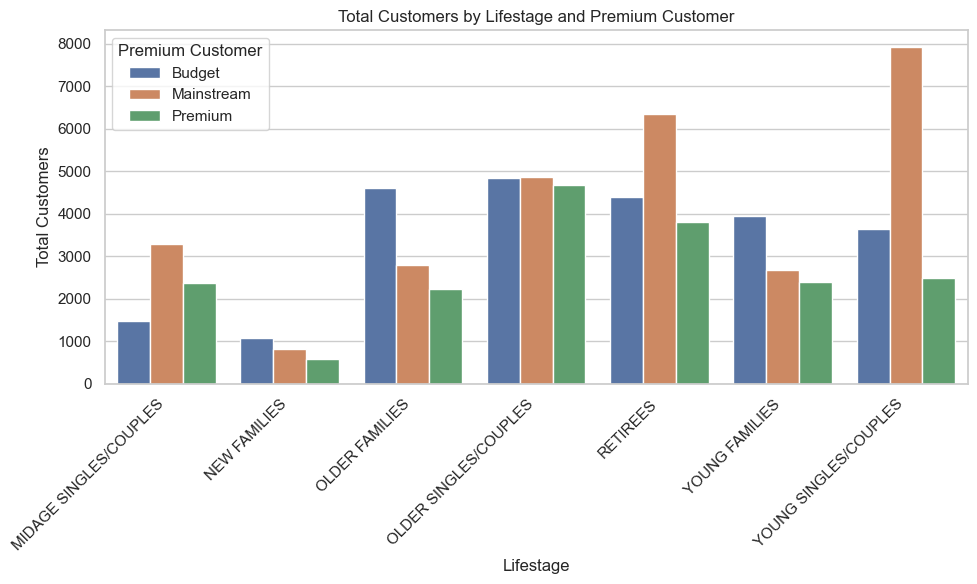

In [46]:
# Total customers by LIFESTAGE and PREMIUM_CUSTOMER
customers = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=customers, x="LIFESTAGE", y="LYLTY_CARD_NBR", hue="PREMIUM_CUSTOMER")
plt.xlabel("Lifestage")
plt.ylabel("Total Customers")
plt.title("Total Customers by Lifestage and Premium Customer")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Premium Customer")
plt.tight_layout()
plt.savefig("Total Customers by Lifestage and Premium Customer.jpg", dpi = 1200)
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this
next.

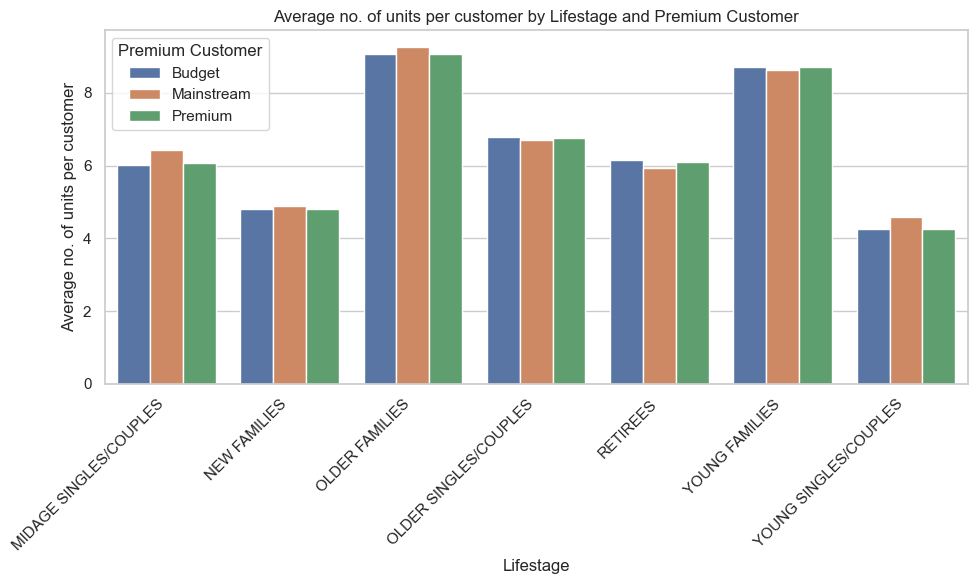

In [47]:
# Average no. of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(QUANTITY = ('PROD_QTY', 'sum'), 
                                                                      NUM_CUSTOMERS = ('LYLTY_CARD_NBR', 'nunique')).reset_index()

avg_units['AVG'] = avg_units['QUANTITY'] / avg_units['NUM_CUSTOMERS']

plt.figure(figsize = (10, 6))
sns.set(style = "whitegrid")
ax = sns.barplot(data = avg_units, x = "LIFESTAGE", y = "AVG", hue = "PREMIUM_CUSTOMER")
plt.xlabel("Lifestage")
plt.ylabel("Average no. of units per customer")
plt.title("Average no. of units per customer by Lifestage and Premium Customer")
plt.xticks(rotation = 45, ha = "right")
plt.legend(title = "Premium Customer")
plt.tight_layout()
plt.savefig("Average no of units per customer by Lifestage and Premium Customer.jpg", dpi = 1200)
plt.show()

Older families and young families in general buy more chips per customer

Let’s also investigate the average price per unit chips bought for each customer segment as this is also a
driver of total sales.

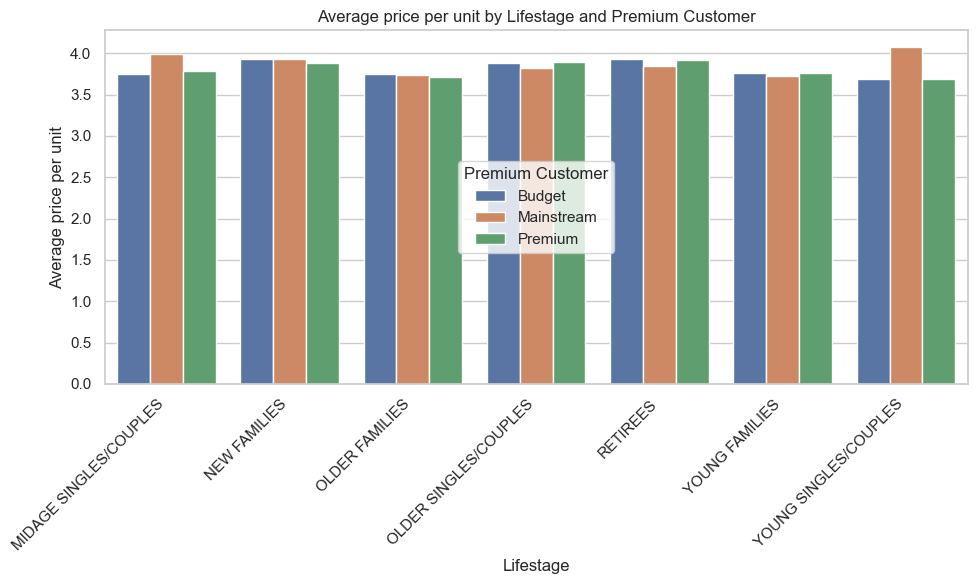

In [48]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(SALES = ('TOT_SALES', 'sum'), 
                                                                      QUANTITY = ('PROD_QTY', 'sum')).reset_index()

avg_price['AVG_PRICE'] = avg_price['SALES'] / avg_price['QUANTITY']

plt.figure(figsize = (10, 6))
sns.set(style = "whitegrid")
ax = sns.barplot(data = avg_price, x = "LIFESTAGE", y = "AVG_PRICE", hue = "PREMIUM_CUSTOMER")
plt.xlabel("Lifestage")
plt.ylabel("Average price per unit")
plt.title("Average price per unit by Lifestage and Premium Customer")
plt.xticks(rotation = 45, ha = "right")
plt.legend(title = "Premium Customer", loc = 'center')
plt.tight_layout()
plt.savefig("Average price per unit by Lifestage and Premium Customer.jpg", dpi = 1200)
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.

#### Deep dive into specific customer segments for insights
We have found quite a few interesting insights that we can dive deeper into. <br>
We might want to target customer segments that contribute the most to sales to retain them or further
increase sales. Let’s look at Mainstream - young singles/couples. For instance, let’s find out if they tend to
buy a particular brand of chips.

In [49]:
# Deep dive into Mainstream, young singles/couples
segment = merged_data[(merged_data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (merged_data['PREMIUM_CUSTOMER'] == "Mainstream")]
other = merged_data[~((merged_data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (merged_data['PREMIUM_CUSTOMER'] == "Mainstream"))]

# Brand affinity compared to the rest of the population
quantity_segment = segment['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

quantity_segment_by_brand = segment.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_segment_by_brand['targetSegment'] = quantity_segment_by_brand['PROD_QTY'] / quantity_segment

quantity_other_by_brand = other.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_other_by_brand['other'] = quantity_other_by_brand['PROD_QTY'] / quantity_other

brand_proportions = pd.merge(quantity_segment_by_brand, quantity_other_by_brand, on='BRAND')
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False, ignore_index = True)
brand_proportions

,BRAND,PROD_QTY_x,targetSegment,PROD_QTY_y,other,affinityToBrand
0,Tyrrells,1143,0.031553,11155,0.025692,1.228095
1,Twisties,1673,0.046184,16445,0.037877,1.219319
2,Doritos,4447,0.122761,43884,0.101075,1.214553
3,Kettle,7172,0.197985,71879,0.165553,1.195897
4,Tostitos,1645,0.045411,16489,0.037978,1.195713
5,Pringles,4326,0.119420,43693,0.100635,1.186670
6,Cobs,1617,0.044638,16954,0.039049,1.143124
7,Infuzions,2343,0.064679,24776,0.057065,1.133435
8,Thins,2187,0.060373,24742,0.056986,1.059423
9,GrnWves,1185,0.032712,13541,0.031188,1.048873


In [37]:
import dataframe_image as dfi

In [44]:
dfi.export(brand_proportions, "brand proportions.jpg", dpi= 1200)

We can see that : <br>
• Mainstream young singles/couples are 22% more likely to purchase Tyrrells chips compared to the
rest of the population <br>
• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population <br>
Let’s also find out if our target segment tends to buy larger packs of chips.

In [50]:
quantity_segment_by_pack = segment.groupby('PACK_SIZE(g)')['PROD_QTY'].sum().reset_index()
quantity_segment_by_pack['targetSegment'] = quantity_segment_by_pack['PROD_QTY'] / quantity_segment

quantity_other_by_pack = other.groupby('PACK_SIZE(g)')['PROD_QTY'].sum().reset_index()
quantity_other_by_pack['other'] = quantity_other_by_pack['PROD_QTY'] / quantity_other

pack_proportions = pd.merge(quantity_segment_by_pack, quantity_other_by_pack, on='PACK_SIZE(g)')
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']
pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False, ignore_index = True)
pack_proportions

,PACK_SIZE(g),PROD_QTY_x,targetSegment,PROD_QTY_y,other,affinityToPack
0,270,1153,0.031829,10896,0.025096,1.268287
1,380,1165,0.032160,11108,0.025584,1.257030
2,330,2220,0.061284,21779,0.050162,1.221717
3,134,4326,0.119420,43693,0.100635,1.186670
4,110,3850,0.106280,38985,0.089791,1.183637
5,210,1055,0.029124,10907,0.025121,1.159318
6,135,535,0.014769,5677,0.013075,1.129511
7,250,520,0.014355,5549,0.012781,1.123166
8,170,2926,0.080773,35162,0.080986,0.997370
9,150,5709,0.157598,70953,0.163421,0.964372


In [51]:
dfi.export(pack_proportions, "pack proportions.jpg", dpi= 1200)

It looks like Mainstream young singles/couples are 26% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [32]:
merged_data[merged_data['PACK_SIZE(g)'] == 270]['BRAND'].unique()[0]

'Twisties'

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

#### Conclusion
Let’s recap what we’ve found!
<br>
<br>
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour. We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.
